In [1]:
import pandas as pd

In [2]:
data_types ={
    "id" : int,
    "postcode" : pd.Int64Dtype()	,
    "city": str,
    "street" : str,
    "area" : "category",
    "user" : "category",
    "size": float
}

In [3]:
df = pd.read_csv("Fixed_Anlage_wo_pwd.csv",dtype=data_types)

In [4]:
df.sample(10)

,id,postcode,city,street,area,user,size
29350,30025,80637,"München, Landeshauptstadt",Hedwig - Dransfeld - Allee 35,Wohnen,Unbekannt,32.70
135888,112387,59425,Unna,Kamener Str. 91 - 93 Dienstliegenschaften,Bundeswehr,Unbekannt,0.00
201335,-1,<NA>,Unbekannt,Dienstliegenschaften,Bundeswehr,BMVg.-Unterbringung,NaN
106899,93278,54292,Trier,Thebaeerstr. 55,Wohnen,Unbekannt,9.92
223542,170218,97762,Hammelburg,Rommelstr. 31,Unbekannt,Unbekannt,609.10
199098,154103,56828,Alflen,N.N. Dienstliegenschaften,Bundeswehr,BMVg.-Unterbringung,30.00
159823,-1,<NA>,Unbekannt,Dienstliegenschaften,Bundeswehr,Unbekannt,NaN
51347,52528,79540,"Lörrach, Stadt",Maienbühlweg 9,Wohnen,Unbekannt,103.90
29944,30633,89075,"Ulm, Universitätsstadt",Werastraße 12,Wohnen,Unbekannt,44.20
102283,-1,<NA>,Unbekannt,Unbekannt,Unbekannt,Unbekannt,NaN


# Which "User" owns the most stuff

In [5]:
df.groupby("user").nunique().sort_values(by="id",ascending=False)

,id,postcode,city,street,area,size
user,,,,,,
Unbekannt,155391,3444,4518,26901,7,27759
BMVg.-Unterbringung,14702,584,518,952,3,9221
Bundesanstalt THW,1364,592,575,657,4,974
Generalzolldirektion,1275,378,334,667,4,844
Bundespolizei,898,198,179,263,2,729
...,...,...,...,...,...,...
Sonst. Bewilligungen,1,0,1,1,1,0
Energie u. Nachhalti,1,1,1,1,1,1
Bilat. Zusammenarb.,1,1,1,1,1,1


# The biggest real estate categories

In [6]:
df.groupby("area").nunique().sort_values(by="id",ascending=False)

,id,postcode,city,street,user,size
area,,,,,,
Wohnen,52772,768,748,11678,4,3630
Unbekannt,35061,591,528,1000,100,11146
Gewerbe/sonst. Nutzung,33121,1575,1882,9024,7,7465
Bundeswehr,28498,587,525,976,7,9293
Dienstliegenschaften,18938,1725,1498,4111,100,9474
Bundesforst,7158,1377,1835,1080,2,5180
Verwaltungsaufgaben,594,241,241,240,2,370


# Managed property per category; sorted by size

In [7]:
df.groupby("area").sum().drop(columns=["id","postcode"]).sort_values(by="size", ascending=False)

,size
area,
Bundesforst,1.250452e+09
Unbekannt,1.064645e+09
Bundeswehr,1.053773e+09
Gewerbe/sonst. Nutzung,9.878014e+07
Dienstliegenschaften,6.608605e+07
Verwaltungsaufgaben,1.499094e+07
Wohnen,3.345593e+06


# Managed property by user; sorted by size

In [8]:
df.groupby("user").sum().drop(columns=["id","postcode"]).sort_values(by="size", ascending=False)

,size
user,
Unbekannt,2.517642e+09
BMVg.-Unterbringung,1.017131e+09
Bundespolizei,5.587492e+06
Julius-Kühn-Institut,2.889755e+06
Max-Rubner-Institut,1.443736e+06
...,...
sonst. Bewil.(BMELV),1.405000e+02
BI f. Sportwissensch,1.145200e+02
Sonst. Bewilligungen,0.000000e+00


# 10 Biggest properties

In [9]:
df.sort_values(by="size",ascending=False).head(10)

,id,postcode,city,street,area,user,size
172504,136529,29683,Osterheide,N.N.,Unbekannt,Unbekannt,143505160.0
212709,163077,39638,Gardelegen,Salchauer Chaussee 1,Unbekannt,Unbekannt,121003889.0
213560,163637,2957,Weißkeißel,Muskauer Forst Dienstliegenschaften,Bundeswehr,BMVg.-Unterbringung,113392861.0
212707,163076,39638,Gardelegen,Salchauer Chaussee 1,Unbekannt,Unbekannt,112234400.0
172503,136528,29683,Osterheide,N.N. Dienstliegenschaften,Bundeswehr,BMVg.-Unterbringung,108444570.0
199387,154294,17358,Torgelow,Pasewalker Chaussee 7,Unbekannt,Unbekannt,93386240.0
212538,162965,39291,Möckern,Bergstr. Dienstliegenschaften,Bundeswehr,BMVg.-Unterbringung,91173377.0
116043,99304,16831,Rheinsberg OT Flecken Zechlin,SCHONORT,Bundesforst,Unbekannt,82487930.0
172498,136523,29633,Munster,Zw. B 209 u. Pl.-Randstr. Brockhs,Unbekannt,Unbekannt,75715466.0
211506,162284,6925,Annaburg,Annaburger Heide,Unbekannt,Unbekannt,70751500.0


# 10 Smallest properties (with a size bigger than 0)

In [10]:
df[df["size"]>0].sort_values(by="size",ascending=True).head(10)
### Weird results

,id,postcode,city,street,area,user,size
88976,81461,14167,Berlin,Jänickestraße 1,Wohnen,Unbekannt,0.001
22642,23163,26441,Jever,Auf der Dreesche u.a.,Wohnen,Unbekannt,0.001
22330,22843,26441,Jever,Auf der Dreesche u.a.,Wohnen,Unbekannt,0.001
89872,82051,12435,Berlin,Puschkinallee 52,Dienstliegenschaften,Unbekannt,0.010
47210,48295,6120,Halle (Saale),Vogelsang/Am Heiderand,Wohnen,Unbekannt,0.010
47209,48294,6120,Halle (Saale),Vogelsang/Am Heiderand,Wohnen,Unbekannt,0.010
47208,48293,6120,Halle (Saale),Vogelsang/Am Heiderand,Wohnen,Unbekannt,0.010
47207,48292,6120,Halle (Saale),Vogelsang/Am Heiderand,Wohnen,Unbekannt,0.010
47206,48291,6120,Halle (Saale),Vogelsang/Am Heiderand,Wohnen,Unbekannt,0.010
87465,80466,6120,Halle (Saale),Vogelsang/Am Heiderand,Wohnen,Unbekannt,0.010


# Distribution of the property size

In [11]:
df["size"].describe()

count    1.761400e+05
mean     2.016619e+04
std      9.011719e+05
min      0.000000e+00
25%      1.040000e+01
50%      6.530000e+01
75%      2.500000e+02
max      1.435052e+08
Name: size, dtype: float64

<AxesSubplot:>

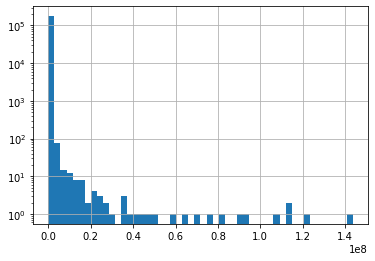

In [12]:
df["size"].hist(bins=50,log=True)

## Soo many small ones... let's zoom in

<AxesSubplot:>

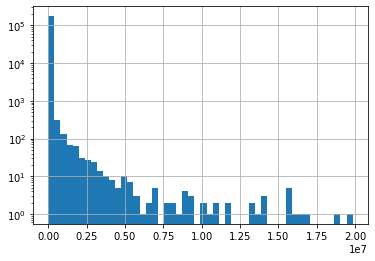

In [13]:
df[df["size"]<0.2e8]["size"].hist(bins=50,log=True)

### Lots of small properties

<AxesSubplot:>

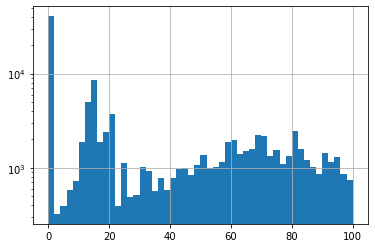

In [14]:
df[df["size"]<100]["size"].hist(bins=50,log=True)

In [15]:
# I need coffee